# Predição de Preços

Nesse projeto iremos predizer o preço de veículos com base em suas características (features). Utilizaremos algoritmos de regressão para encontrar o melhor modelo preditivo.

A base de dados será retirada do Kaggle.

O intuito é criar uma aplicação para uma loja de veículos. Além da intuição e pesquisa de mercado, é importante para os vendedores terem uma ferramenta automatizada de predição para terem um indicador confiável de qual preço devem vender os veículos.

In [4]:
# Importando os pacotes necessários para manipulação e visualização de dados:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
# Importanto tudo o necessário dentro do pacote scikit-learn:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [14]:
# Configurando o pandas para mostrar todas as linhas e colunas:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configurando o pandas para não mostrar a notação científica:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [16]:
# Carregando a base de dados:
carros = pd.read_csv('C:\\data_science\\projeto-predicao-precos-veiculos\\cardekho_imputated.csv')
carros.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [19]:
carros.shape

(15411, 16)

Temos então 15.411 carros na nossa base de dados.

A primeira coluna pode ser removida, ou transformada em índice. A última coluna (selling_price) é a nossa variável <b>target</b>, ou seja, a variável que queremos prever. Logo teremos ao todo 14 features para ajudar o nosso modelo preditivo.

As features <i>engine</i> e <i>mileage</i> são as cilindradas do motor e o consumo em km/litro, respectivamente.

In [22]:
# Eliminando a primeira coluna:
carros = carros.drop(carros.columns[0], axis=1)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [24]:
carros.shape

(15411, 15)

Como nossa target é um número real (ou seja, variável numérica e contínua), iremos modelá-la como uma <b> regressão </b>.

In [28]:
carros['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

Dicionário:
1. Petrol = Gasolina
2. Diesel = Diesel
3. CNG = GNV (Gás Natural Veicular)
4. LPG = GLP (Gás Liquefeito de Petróleo)
5. Eletric = Elétrico

In [31]:
# Informações básicas das features:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   min_cost_price     15411 non-null  float64
 4   max_cost_price     15411 non-null  float64
 5   vehicle_age        15411 non-null  int64  
 6   km_driven          15411 non-null  int64  
 7   seller_type        15411 non-null  object 
 8   fuel_type          15411 non-null  object 
 9   transmission_type  15411 non-null  object 
 10  mileage            15411 non-null  float64
 11  engine             15411 non-null  int64  
 12  max_power          15411 non-null  float64
 13  seats              15411 non-null  int64  
 14  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.8+ MB


Temos muitas variáveis do tipo object, que precisarão ser codificadas (transformadas em números) antes de criarmos os modelos preditivos.

In [34]:
# Verificando se existem dados faltantes:
carros.isnull().sum()

car_name             0
brand                0
model                0
min_cost_price       0
max_cost_price       0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

Excelente! Não existem dados faltantes, logo não será necessário o tratamento de <i>missing data</i>.

In [37]:
# Distribuição das variáveis categóricas (exceto o nome do veículo):
print(carros['fuel_type'].value_counts())
print(carros['seller_type'].value_counts())
print(carros['transmission_type'].value_counts())
print(carros['brand'].value_counts())
print(carros['model'].value_counts())

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64
seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64
transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64
brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce       

In [39]:
# Conhecendo os parâmetros estatísticos dos dados (features numéricas):
carros.describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,5892971.12,1962623.92,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,56698513.93,2889635.64,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,311000.00,436000.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,668000.00,872866.67,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,855000.00,1206000.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,1284000.00,1743000.00,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,988000000.00,91100000.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [61]:
colunas_precos = [coluna for coluna in carros.columns if 'price' in coluna]
colunas_precos

['min_cost_price', 'max_cost_price', 'selling_price']

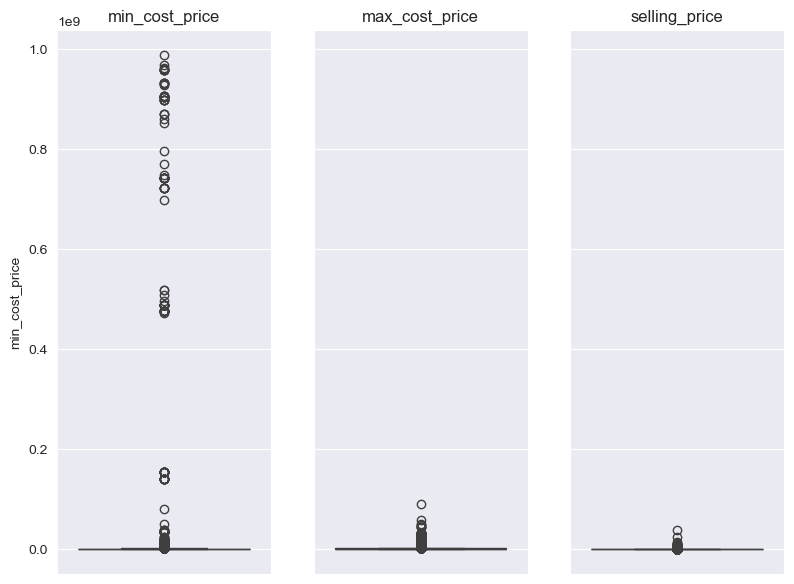

In [67]:
# Vamos plotar um boxplot das variáveis de preço, para verificar existência de outliers:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 3, sharey=True, figsize=(8,6))
plt.tight_layout()

#Plotando 1 boxplot por feature:
for i in range(3):
    coluna_1 = colunas_precos[i]
    sns.boxplot(data=carros, y=coluna_1, ax=graficos[i])
    graficos[i].set_title(coluna_1)

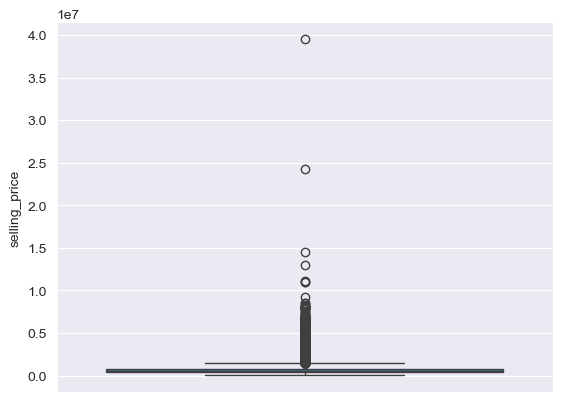

In [70]:
# Vamos verificar apenas o boxplot da nossa variável target:
sns.set_style("darkgrid")
sns.boxplot(data=carros, y=carros['selling_price'])
plt.show()

Os boxplots foram deploráveis.